In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chifoumy/data/chifoumi-dataset.csv')
df.head()

,filename,1x,1y,1z,2x,2y,2z,3x,3y,3z,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
0,../raw_data/scissors/dFlxUAypUgfOZqoV.png,0.972548,0.503541,0.000002,0.888238,0.670902,-0.020812,0.766331,0.698617,-0.052920,...,0.682782,0.291712,-0.138871,0.707206,0.337388,-0.104174,0.752084,0.343444,-0.066942,2
1,../raw_data/scissors/b4Qm4ZK5AAUQo1Ax.png,0.883314,0.585556,0.000001,0.758897,0.738274,-0.000408,0.619175,0.731899,-0.014292,...,0.554995,0.351059,-0.067778,0.577250,0.405897,-0.036943,0.619907,0.421913,-0.008412,2
2,../raw_data/scissors/msOEQAWveiL7r5rp.png,0.910765,0.598994,0.000001,0.836391,0.407034,-0.027133,0.722001,0.359720,-0.052438,...,0.619692,0.700938,-0.096034,0.657051,0.666762,-0.070877,0.697424,0.658073,-0.042735,2
3,../raw_data/scissors/FfCLY0qhfyOoyam8.png,0.942804,0.452263,0.000001,0.843116,0.593405,-0.018791,0.718336,0.579437,-0.043036,...,0.655527,0.150431,-0.129719,0.675466,0.203113,-0.098801,0.716827,0.225120,-0.063351,2
4,../raw_data/scissors/7jLYhf025vHEX7kp.png,0.916129,0.525466,0.000002,0.825934,0.410975,-0.030042,0.722051,0.406688,-0.057272,...,0.715275,0.790811,-0.111477,0.755227,0.748631,-0.089387,0.783695,0.725269,-0.060035,2


In [3]:
df.shape

(8208, 65)

In [4]:
df.describe()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
count,8208.000000,8208.000000,8.208000e+03,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,...,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,0.498215,0.496042,5.731623e-07,0.497596,0.553043,-0.015087,0.497673,0.571352,-0.029864,0.497956,...,0.498494,0.440604,-0.072921,0.497850,0.448023,-0.055157,0.497903,0.450076,-0.038176,1.001706
std,0.292279,0.292288,1.221204e-06,0.257598,0.250718,0.031433,0.223186,0.210190,0.048612,0.189036,...,0.186719,0.177661,0.079548,0.179455,0.172675,0.089577,0.191972,0.185598,0.095996,0.812356
min,-0.150064,-0.147117,-3.062199e-06,-0.078356,-0.070512,-0.263005,-0.040289,-0.000656,-0.317181,-0.046079,...,-0.085957,-0.065340,-0.374900,-0.151302,-0.058732,-0.409124,-0.205810,-0.076648,-0.429250,0.000000
25%,0.263999,0.270309,-3.524245e-07,0.266912,0.326108,-0.035257,0.301580,0.371687,-0.059719,0.372164,...,0.353425,0.301338,-0.125974,0.355797,0.317883,-0.115241,0.336347,0.309523,-0.105654,0.000000
50%,0.497810,0.489946,9.255353e-07,0.495409,0.627914,-0.016675,0.495612,0.632259,-0.034268,0.497721,...,0.499253,0.430815,-0.084451,0.498642,0.420642,-0.069765,0.497461,0.401043,-0.040849,1.000000
75%,0.731976,0.736126,1.478217e-06,0.728109,0.748820,0.005558,0.694955,0.735060,0.002794,0.625498,...,0.644160,0.553720,-0.012203,0.639919,0.573186,0.014488,0.659332,0.610617,0.033325,2.000000
max,1.149934,1.110032,3.154388e-06,1.072792,1.069952,0.186926,1.030578,1.023172,0.273608,1.030922,...,1.076971,1.078582,0.361737,1.141539,1.140382,0.437521,1.196496,1.192943,0.491018,2.000000


In [5]:
data = df.copy()

In [6]:
X = data.drop(columns = ['filename', 'target'])
y = data['target']

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled.shape

(8208, 63)

In [8]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_tree_class = DecisionTreeClassifier()
base_tree = cross_validate(model_tree_class, X_train, y_train, cv = 5, scoring = 'accuracy')
base_tree

{'fit_time': array([0.18032718, 0.1777091 , 0.17986202, 0.19433999, 0.18232298]),
 'score_time': array([0.00043082, 0.00043392, 0.00049615, 0.0003581 , 0.00037026]),
 'test_score': array([0.96753247, 0.98537774, 0.97725426, 0.981316  , 0.97725426])}

In [10]:
base_tree['test_score'].mean()

0.977746948421197

In [11]:
%%time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats

# Instanciate model
model = model_tree_class

# Hyperparameter search space
search_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_samples_leaf' : [0.1, 0.5, 1, 2, 5],
    'min_samples_split' : [0.1, 0.5, 2, 5, 10]
}

# Instanciate Random Search
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, verbose=0)


rsearch.fit(X_scaled,y)

CPU times: user 802 ms, sys: 187 ms, total: 989 ms
Wall time: 14.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.1, 0.5, 1, 2, 5],
                         'min_samples_split': [0.1, 0.5, 2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [12]:
rsearch.best_params_

{'criterion': 'log_loss',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'best'}

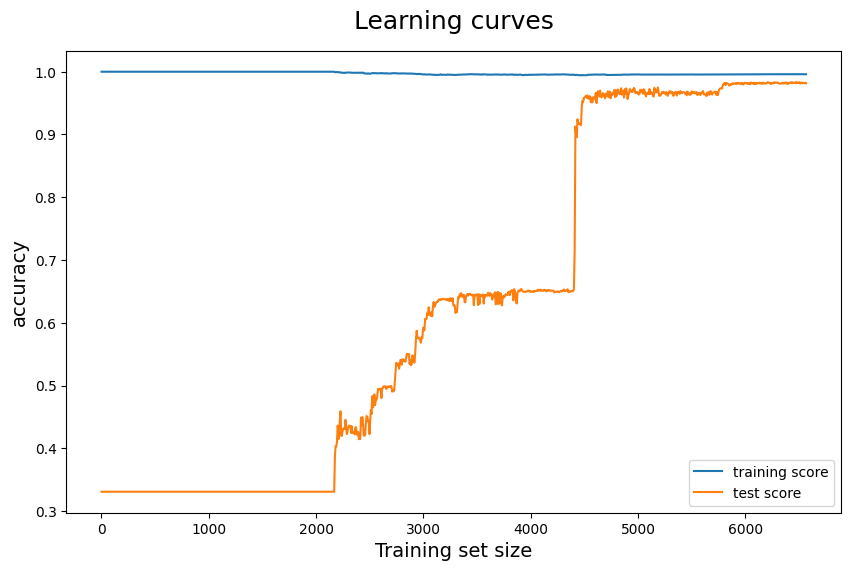

In [14]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# create the training size slices
train_sizes = np.linspace(1, 6566, num = 1000, dtype='int')

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(\
                                                        estimator = DecisionTreeClassifier(criterion = 'entropy',\
                                                                                        min_samples_leaf = 5,
                                                                                        min_samples_split = 2,
                                                                                        splitter = 'best'),
                                                        X = X_scaled, 
                                                        y = y,
                                                        scoring = 'accuracy',
                                                        train_sizes = train_sizes, 
                                                        cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [15]:
X_train

array([[0.41764299, 0.85670913, 0.76917343, ..., 0.30471405, 0.36348641,
        0.25535793],
       [0.52474995, 0.77379198, 0.27868583, ..., 0.6394579 , 0.54227857,
        0.4925726 ],
       [0.04968459, 0.78699832, 0.99558982, ..., 0.09629204, 0.54529277,
        0.30032278],
       ...,
       [0.57402757, 0.17354726, 0.6941315 , ..., 0.35646355, 0.5490003 ,
        0.31380665],
       [0.46241706, 0.11246489, 0.22271142, ..., 0.36098417, 0.25579511,
        0.57196265],
       [0.53085792, 0.22117597, 0.79644974, ..., 0.48154023, 0.26757655,
        0.45373376]])

In [16]:
from sklearn.linear_model import Ridge, Lasso

DTree = DecisionTreeClassifier().fit(X_train, y_train)
ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    # "coef_linreg": pd.Series(DTree.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index = X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_ridge,coef_lasso
1x,0,0
1y,0,0
1z,2,0
2x,0,0
2y,1,0
2z,0,0
3x,0,0
3y,0,0
3z,1,0
4x,0,0


In [16]:
%%time
model_tree_class = DecisionTreeClassifier(criterion = 'entropy',\
                                          min_samples_leaf = 2,
                                          min_samples_split = 2,
                                          splitter = 'random').fit(X_train, y_train)
y_pred = model_tree_class.predict(X_test)

CPU times: user 15.4 ms, sys: 2.82 ms, total: 18.2 ms
Wall time: 19.5 ms


In [17]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

In [18]:
confusion_matrix

predicted,0,1,2
actual,,,
0,644,2,1
1,3,669,12
2,6,17,698


In [19]:
X_test.shape, y_test.shape

((513, 42), (513,))

In [17]:
score = cross_validate(model_tree_class, X_train, y_train, scoring='accuracy')

In [18]:
score['test_score'].mean()

0.9754709242828659

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9800194931773879